In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
experiment_result_folder = '/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/evaluation/'
data_folder = '/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/data/'

# SCORE

In [35]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'all_score_evaluation.csv', 'w') as outfile:
    outfile.write('protein_family,method,score\n')
    for pr in ['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000']:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*score*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 

,protein_family,method,score
0,CYP2U_165,bep,5057
1,CYP2U_165,psp,4782
2,CYP2U_165,sicp,5121
3,CYP2U_165,mip,4635


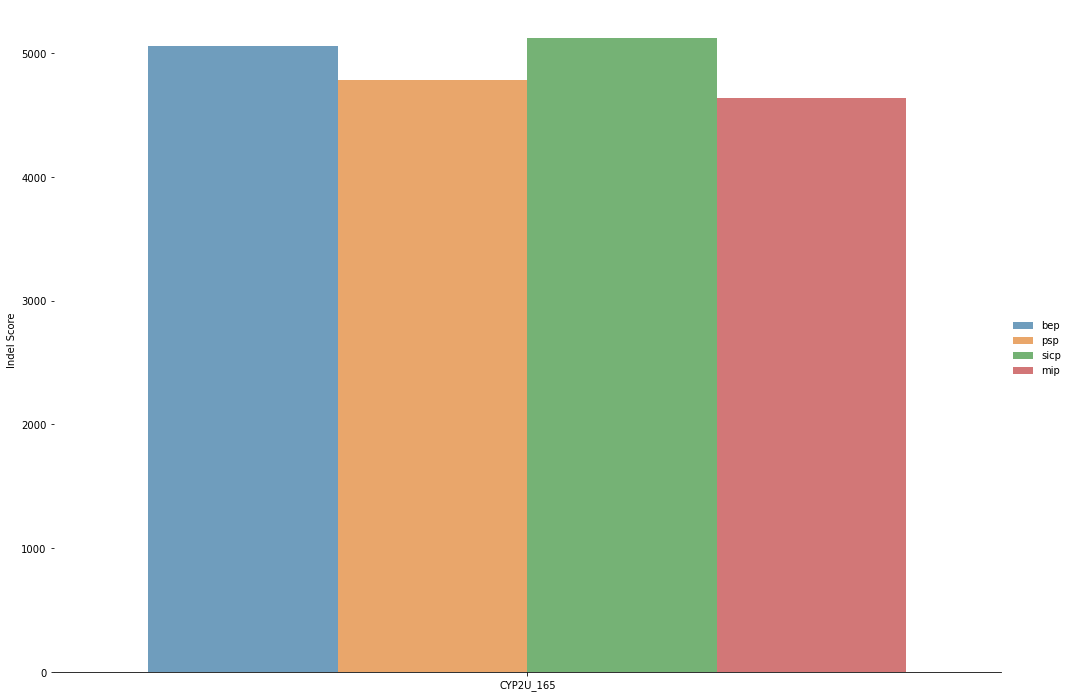

In [41]:
score_data = pd.read_csv(experiment_result_folder + 'all_score_evaluation.csv')
display(score_data.head(10))
g = sns.catplot(data = score_data, kind='bar', x="protein_family", y="score", hue="method", alpha=.7, height=10, aspect=11.7/8.27)
g.despine(left=True)
g.set_axis_labels("", "Indel Score")
g.legend.set_title("")
plt.savefig(experiment_result_folder + 'indel_score_plot.png')

# NEW/OLD PATTERNS

In [52]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'new_patterns_evaluation.csv', 'w') as outfile:
    outfile.write('protein_family,method,new_patterns,total_ancestors\n')
    for pr in ['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000']:
        total_ancestors = int(pr.split('_')[1]) - 1
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*new_pattern*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + ',' + str(total_ancestors) + '\n') 

,protein_family,method,new_patterns,total_ancestors,new_patterns%
0,CYP2U_165,sicp,41,164,0.25
1,CYP2U_165,bep,38,164,0.23
2,CYP2U_165,mip,46,164,0.28
3,CYP2U_165,psp,45,164,0.27


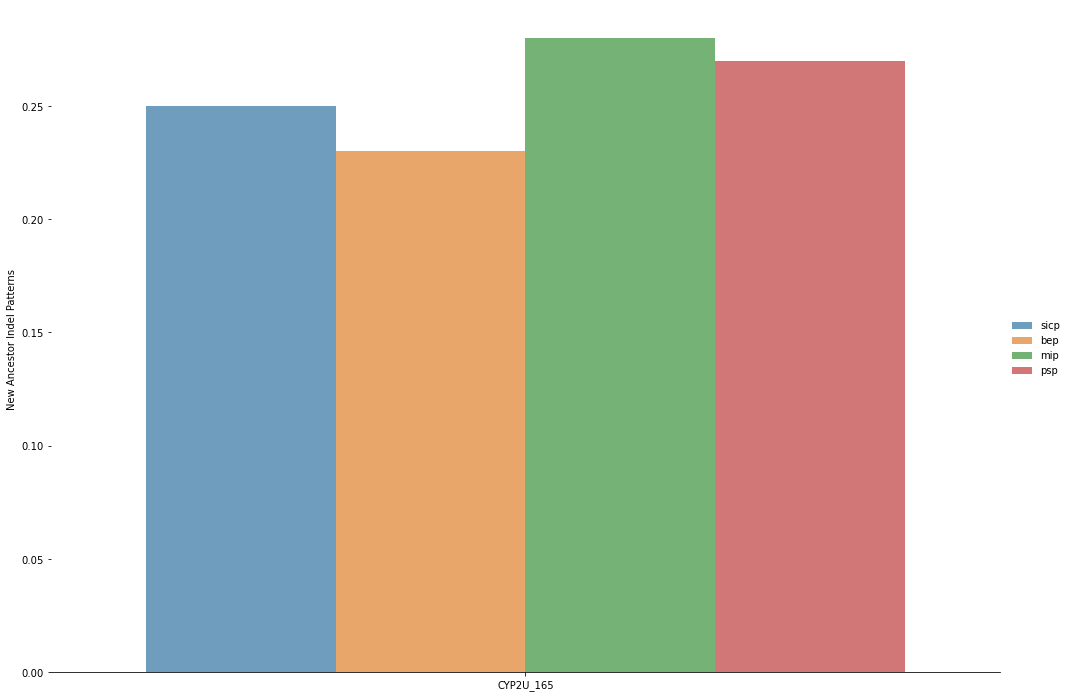

In [56]:
new_old_p_data = pd.read_csv(experiment_result_folder + 'new_patterns_evaluation.csv')
new_old_p_data['new_patterns%'] = round(new_old_p_data['new_patterns'] / (new_old_p_data['total_ancestors']),2)
display(new_old_p_data.head(10))

g = sns.catplot(data = new_old_p_data, kind='bar', x="protein_family", y="new_patterns%", hue="method",  alpha=.7, height=10, aspect=11.7/8.27)
g.despine(left=True)
g.set_axis_labels("", "New Ancestor Indel Patterns")
g.legend.set_title("")

# OUT OF DISTRIBUTION PATTERNS


In [37]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'out_of_dist_evaluation.csv', 'w') as outfile:
    outfile.write('protein_family,method,out_of_dist_percent\n')
    for pr in ['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000']:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*out_dist_percent*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 

,protein_family,method,out_of_dist_percent
0,CYP2U_165,bep,0.0
1,CYP2U_165,sicp,0.0
2,CYP2U_165,mip,0.0
3,CYP2U_165,psp,6.7


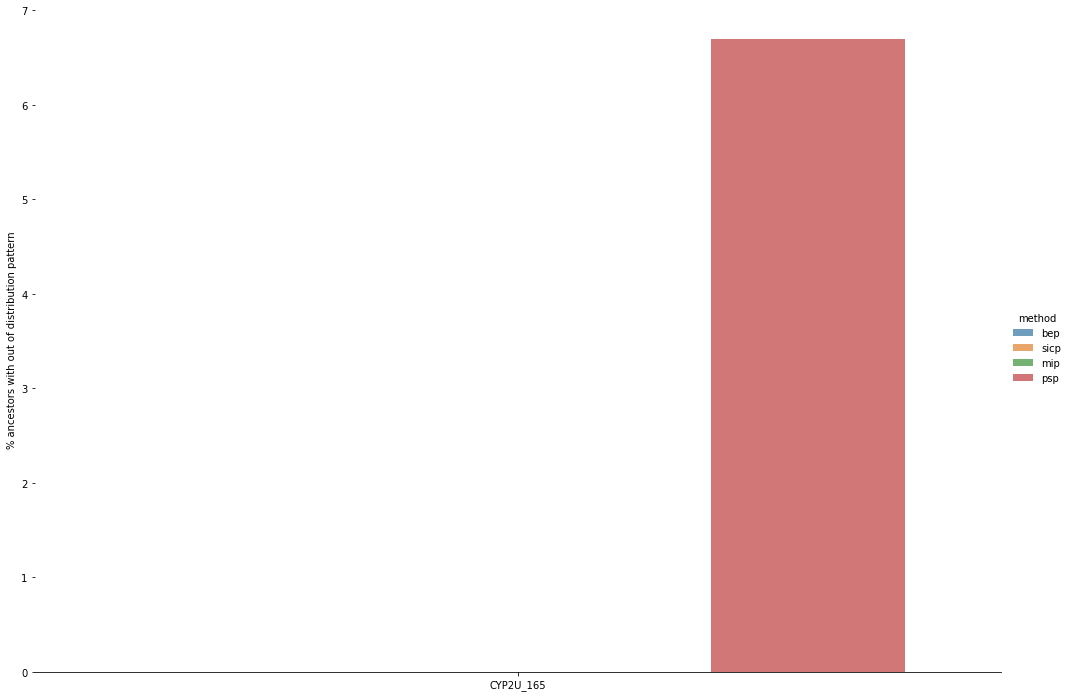

In [40]:
out_of_dist_data = pd.read_csv(experiment_result_folder + 'out_of_dist_evaluation.csv')
display(out_of_dist_data.head(10))
g = sns.catplot(data = out_of_dist_data, kind='bar', x="protein_family", y="out_of_dist_percent", hue="method",  alpha=.7, height=10, aspect=11.7/8.27)
g.despine(left=True)
g.set_axis_labels("", "% ancestors with out of distribution pattern")

# ANCESTORS WITH 3 MUTATION AWAY FROM ITS NEIGHBOURS

In [42]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'ancestors_3_mutation_away.csv', 'w') as outfile:
    outfile.write('protein_family,method,ancestors_3_mutation_percent\n')
    for pr in ['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000']:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*ancestors_with_3_mut*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 

,protein_family,method,ancestors_3_mutation_percent
0,CYP2U_165,mip,0.00
1,CYP2U_165,bep,1.22
2,CYP2U_165,psp,0.00
3,CYP2U_165,sicp,0.00


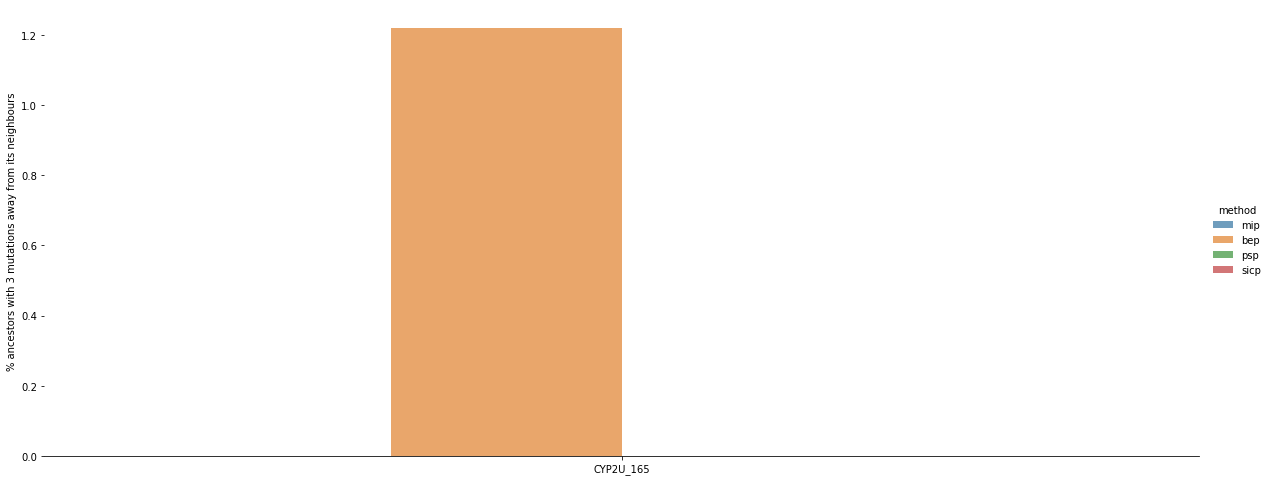

In [44]:
a_3_mut_data = pd.read_csv(experiment_result_folder + 'ancestors_3_mutation_away.csv')
display(a_3_mut_data.head(10))
g = sns.catplot(data = a_3_mut_data, kind='bar', x="protein_family", y="ancestors_3_mutation_percent", hue="method", alpha=.7, height=7, aspect=20/8.27)
g.despine(left=True)
g.set_axis_labels("", "% ancestors with 3 mutations away from its neighbours")